# Assignment 1.1 – Monte Carlo Simulation 
Ari Viitala

## a) Describe the advantages and disadvantages of the cases where

### 1) Too many full-fare seats were reserved
If we have too many full fare seats reserved, it means that the plane will not become full i.e. the company will not sell all the available seats causing one low fare ticket of net loss per empty seat. The advantage is that the company's theoretical maximum profit is higher if they manage sell the palne full. More reserved full fare seats also makes it possible for the valuable customers of the company to always have free room even right before take-off and this way enables the plane company to offer good serveice for key customers. 

### 2) Too few full fare seats were reserved
This means that the plane company sells a full plane and it could have sold seats at a higher rate also. Instead they sold cheaper tickets which causes a net loss of high fare price minus low fare price per each ticket sold too cheaply. This also lowers the theoretical maximum profit that the company can get from the plane and there is not neccesarily room for the key customers who reserve their flights closet to the departure. However the company is expected to sell more tickets so there wont be as many empty seats if more seats are sold at the discount price.

## b) Simulating the amount of sold full fare tickets
Like in the case study the demand follows a normal distribution with mean of 180 and standard deviation of 30. With this we can draw amounts of people who are willing to buy the low fare ticket to the plane. If we take away from this the amount of low fare tickets we are left with people who were not able to get the low fare ticket. In the case study it was assumed that 60% of these people will still buy the high fare ticket. So the expected value of sold full fare tickets will be the minimum of the amount of places on the plane and 0.6 times the people left without cheap tickets. 

## c) Determine the optimal number of full-fare seats to be reserved. What is the corresponding revenue?
The optimal number of seats and the corresponding revenue can calculated with the following Python code.

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#capacity of the plane
capacity = 164
#numer of demands simulated for each reservation amount
iterations = 200000

#parameters for the distribution of demand
mu = 180
sigma = 30

#ticket prices
lowFare = 70
highFare = 100

#lists to save our results
expectedRevenues = []
deviations = []

#loop over all possible reservation amounts 
#Note L = the amount of low fare seats sold!
for L in range(0, capacity + 1):
    revenues = [] #vector for revenues from different demands
    demands = np.random.normal(mu, sigma, iterations) #simulationg the demands
    
    #calculating revenue
    for i in demands:
        if i <= L:
            revenues.append(lowFare * i)
        else:
            revenues.append(min([lowFare * L + 0.6 * (i - L) * highFare, lowFare * L + highFare * (capacity - L)]))
    
    #adding results to the result vector
    expectedRevenues.append(np.average(revenues))
    deviations.append(np.std(revenues))

### Plotting the expected return as a function of reserved full fare seats 

In [41]:
%matplotlib inline

Text(0.5,0,'Reserved seats for full fare')

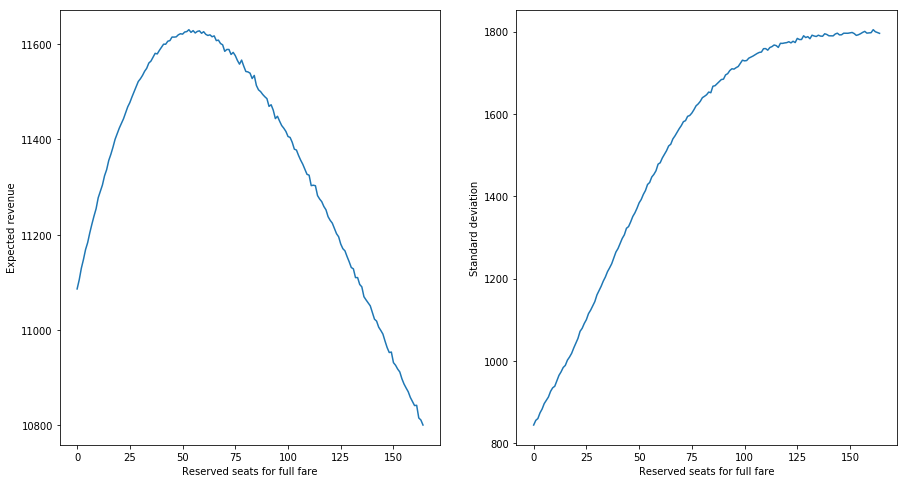

In [52]:
plt.figure(1,(15,8))
plt.subplot(121)
plt.plot(list(reversed(expectedRevenues))) #Reversed since I used low fare seats for calculation
plt.ylabel("Expected revenue")
plt.xlabel("Reserved seats for full fare")

plt.subplot(122)
plt.plot(list((reversed(deviations))))            
plt.ylabel("Standard deviation")
plt.xlabel("Reserved seats for full fare")    

In [53]:
capacity - expectedRevenues.index(max(expectedRevenues))

53

In [54]:
max(expectedRevenues)

11630.61565198569

We can see that the maximum expected revenue is achieved when amount of seats reserved for full fare tickets is a little more than 50. There is a little fluctuation even at this resolution but this result is pretty close. 

### d) Compared to the case study
The result is pretty well in line with the case study. The maximum there is also reached between 50 and 60 and the maximum is a bit over 11600 dollars. However there seems to be a dip in expected revenue in the case's solution at R = 55. This is probably due to the random nature of Monte Carlo simultaion. The absolute differences in revenues are relatively small so this can be just random fluctuation. Also the computational resources back then were not probably even close to day. I think that the 16000 trials were the 10 different Rs combined. I for example calculated every single R from 0 to 164 each with 200000 trials whic is maybe a bit overkill but at least my plots are smooth. 

### e) How this could have been done analytically 
We can not draw a prbability for a certain demand from normal distribution because it is continuous, but we could divide the CDF of normal distribtion into small intervals and calculate the probability of demand being for example between 169,5 and 170,5 and say that this is the probability that demand is 170. From this we could calculate the revenue associated with this demand for a ceratin R like before and multiply this with the probality to get the expected value. Then we just go through every single R and calculate the average expected return by summing through all of the different expected values to get the average expected value for revenue. Then just pick the R that has the highest expected revenue. 